In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [64]:
df = pd.read_csv("titanic_train.csv")

***1) Dataset Overview***

In [65]:
print("Shape:", df.shape)
print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape: (891, 12)
number of rows:  891
number of columns:  12


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**2) Missing Values check**

In [67]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

**3) Duplicate Rows Check**

In [68]:
duplicate_count = df.duplicated().sum()
print("Total duplicate rows:", duplicate_count)

Total duplicate rows: 0


In [69]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**4) Univariate Analysis**

*4.1) Survival Distribution*

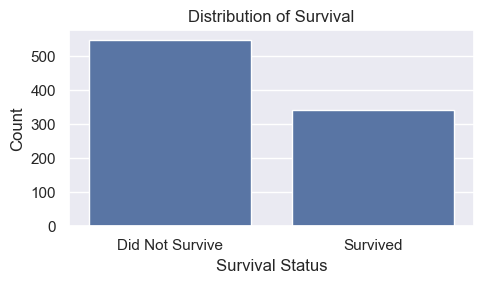

In [70]:
plt.figure(figsize=(5,3))

sns.countplot(x="Survived", data=df)

plt.title("Distribution of Survival")
plt.xlabel("Survival Status")
plt.ylabel("Count")

plt.xticks([0,1], ["Did Not Survive", "Survived"])

plt.tight_layout()
plt.show()

*4.2) age Distribution*

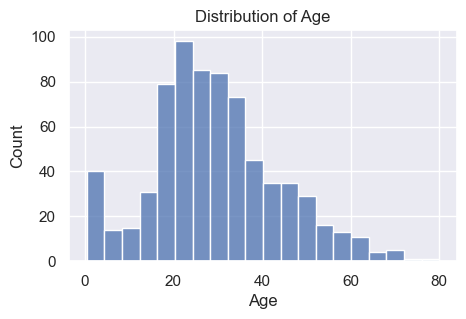

In [71]:
plt.figure(figsize=(5,3))

sns.histplot(df['Age'], bins=20)

plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

*4.3) fare Distribution*

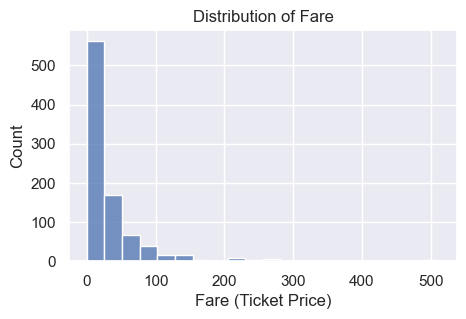

In [72]:
plt.figure(figsize=(5,3))

sns.histplot(df['Fare'], bins=20)

plt.title("Distribution of Fare")
plt.xlabel("Fare (Ticket Price)")
plt.ylabel("Count")

plt.show()

*4.4) sex Distribution*

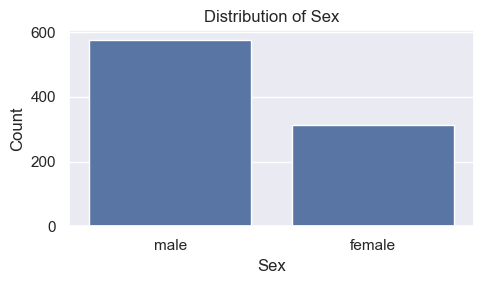

In [73]:
plt.figure(figsize=(5,3))

sns.countplot(x="Sex", data=df)

plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

*4.5) Passenger class Distribution*

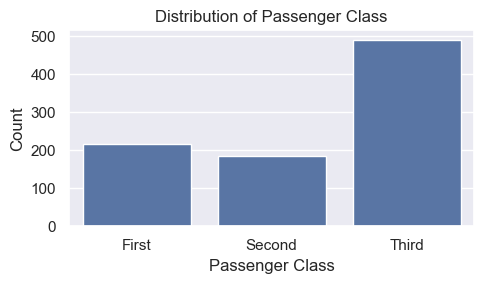

In [74]:
plt.figure(figsize=(5,3))

sns.countplot(x="Pclass", data=df)

plt.title("Distribution of Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")

plt.xticks([0,1,2,], ["First", "Second", "Third"])

plt.tight_layout()
plt.show()

**5) Bivariate Analysis**

*5.1) Survival Rate by Passenger Class*

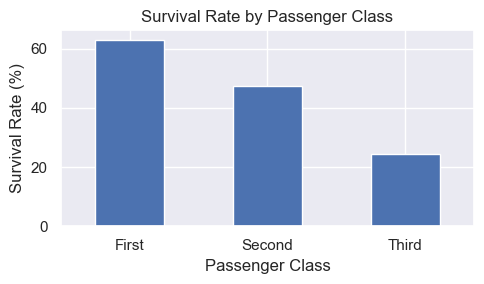

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [75]:
survival_by_class = df.groupby('Pclass')['Survived'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(5,3))
survival_by_class.plot(kind='bar')

plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")

plt.xticks([0,1,2], ["First", "Second", "Third"], rotation=0)

plt.tight_layout()
plt.show()

survival_by_class

*5.2) Survival Rate by Sex*

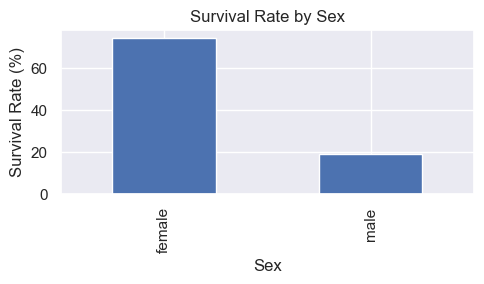

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [76]:
survival_by_sex = df.groupby('Sex')['Survived'].mean().sort_values(ascending=False) *100

plt.figure(figsize=(5,3))
survival_by_sex.plot(kind='bar')

plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate (%)")

plt.tight_layout()
plt.show()

survival_by_sex

*5.3) Survival by Age*

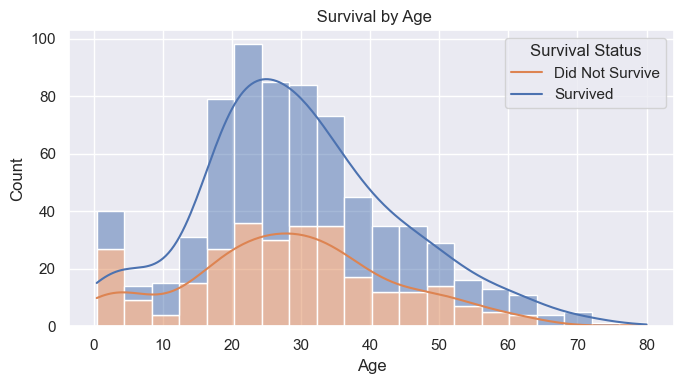

In [77]:
plt.figure(figsize=(7,4))

sns.histplot(
    data=df,
    x="Age",
    hue="Survived",
    bins=20,
    kde=True,
    multiple="stack"
)

plt.title(" Survival by Age")
plt.xlabel("Age")
plt.ylabel("Count")

plt.legend(title="Survival Status", labels=["Did Not Survive", "Survived"])

plt.tight_layout()
plt.show()

**6) Correlation Matrix**

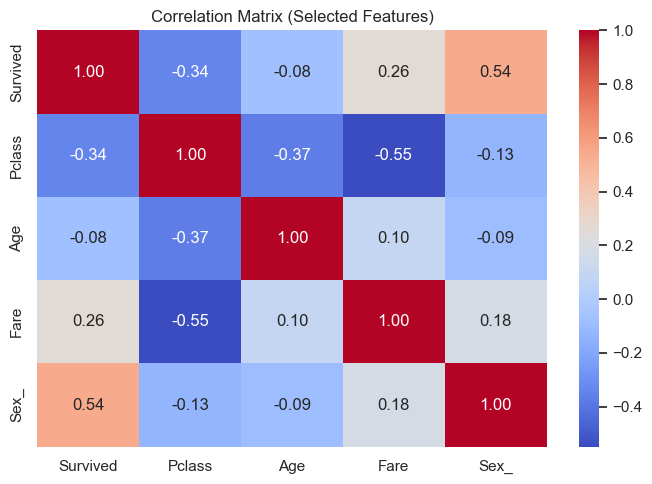

In [79]:
plt.figure(figsize=(7,5))

df["Sex_"] = df["Sex"].map({"male": 0, "female": 1})
sns.heatmap(
    df[['Survived', 'Pclass', 'Age', 'Fare', 'Sex_']].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Matrix (Selected Features)")
plt.tight_layout()
plt.show()

 ###  Conclusion
- Most passengers did not survive.

- Females had higher survival rates than males.

- First-class passengers survived more than third-class.

- Younger passengers had slightly better survival chances.

- Higher fares were linked to higher survival rates.